Let's try to solve a linear system using our solver and compare the solution with the 
Julia \ solver.

In [1]:
# Load the Julia file with code for our solver
include("src/getrf.jl")
using LinearAlgebra
using Random
using PlotlyJS

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-9267365598612685938\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-6940405421878583849\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-9267365598612685938\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
n = 64
Random.seed!(2018)
A = rand(n,n) # Matrix A
A0 = copy(A) # Save a copy
xe = rand(n) # This will be our solution
b = A * xe # This is our right-hand side b
;

In [3]:
# Solve Ax = b using our solver
P = getrf!(A) # Factorization
# Solve
x = getrs(A, P, b)
# Print the error
@show norm(x-xe)
# The error should be small
norm(x-xe) < 1e-12 ? "SUCCESS" : "FAIL"

norm(x - xe) = 1.9816456433210509e-13


"SUCCESS"

In [4]:
# Let's compare with Julia's solver
A = copy(A0) # Reset A to its original value
x_jl = A \ b
# Print the error
@show norm(x_jl-xe)
norm(x_jl-xe) < 1e-12 ? "SUCCESS" : "FAIL"

norm(x_jl - xe) = 3.914132951874621e-14


"SUCCESS"

Let's plot something

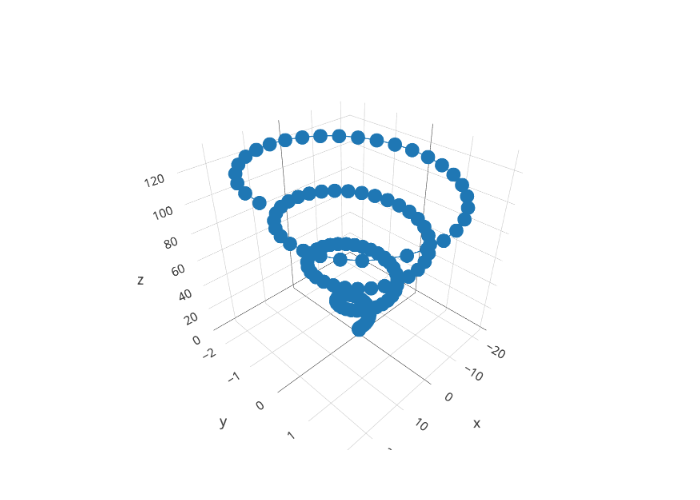

In [5]:
# 3D plot
n = 128
ts = LinRange(0,8π,n) # Type \pi followed by TAB to get the pi symbol
x = ts .* cos.(ts)
y = (0.1ts) .* sin.(ts)
z = 1:n
plot([scatter3d(x=x,y=y,z=z)])
# Default spiral with markers

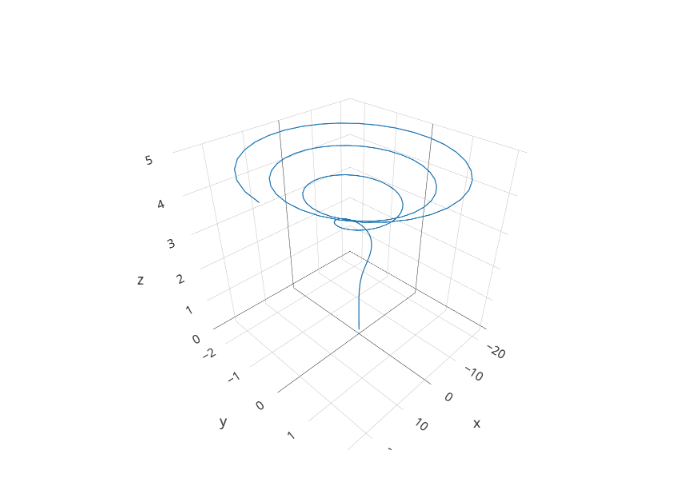

In [6]:
# 3D plot
n = 128
ts = range(0,stop=8π,length=n) # Type \pi followed by TAB to get the pi symbol
x = ts .* cos.(ts)
y = (0.1ts) .* sin.(ts)
z = 1:n
z = log.(z)
plot([scatter3d(x=x,y=y,z=z,mode="lines")])
# Spiral without markers